In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#IT Ticket Category Prediction
#Using Tensorflow
#RNN
#CNN
#LSTM

#This dataset is about the IT Service Ticket Categeory Classification.
#By accurately classifying tickets, IT teams can prioritize tasks, allocate resources effectively, 
#and streamline the resolution process.
#The dataset contains ticket descriptions and category type as target field
#We train the dataset on the descriptions and map it to the target field using Supervised learning.
#The objective of the model is to classify which category a ticket should be assigned to.
#The following cells gives a glance about the dataset used.

#Name   : Ashwin Sai C
#Course : NLP - CS6320-001
#Title  : Text Classification using RNN, CNN & LSTM from Tensorflow/keras
#Term   : Spring 2024



In [4]:
import os
import itertools
import re
import gensim
from   collections import Counter
import pandas as pd
import numpy as np
from   sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
from   nltk.tokenize import word_tokenize
from   nltk.corpus import stopwords
from   nltk.stem import WordNetLemmatizer
from   sklearn.feature_extraction.text import TfidfVectorizer
from   sklearn.preprocessing import LabelEncoder
from   sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from   tensorflow.keras.models import Sequential
from   tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalAveragePooling1D, SimpleRNN, Bidirectional
from   tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, TextVectorization
from   tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, ConvLSTM2D, MaxPooling1D
from   tensorflow.keras.preprocessing.text import Tokenizer
from   tensorflow.keras.preprocessing.sequence import pad_sequences
from   keras.utils import to_categorical
from   transformers import AlbertTokenizer, TFAlbertForSequenceClassification
import nltk
from   nltk.corpus import stopwords
import tensorflow_hub as hub

if __name__ == "__main__":
	print("hi")

hi


In [5]:
#Read the csv file
file_name = r"/kaggle/input/it-ticket-dataset/all_tickets_processed_improved_v3.csv"
df        = pd.read_csv(file_name)

In [6]:
#Print the head data section first 5 rows
df.head()

,Document,Topic_group
0,connection with icon icon dear please setup ic...,Hardware
1,work experience user work experience user hi w...,Access
2,requesting for meeting requesting meeting hi p...,Hardware
3,reset passwords for external accounts re expir...,Access
4,mail verification warning hi has got attached ...,Miscellaneous


In [7]:
#Describe the data set
df.describe()

,Document,Topic_group
count,47837,47837
unique,47837,8
top,running out on extensions hello please be advi...,Hardware
freq,1,13617


In [8]:
print("The list of IT Service Requests:\n")
df['Document']

The list of IT Service Requests:



0        connection with icon icon dear please setup ic...
1        work experience user work experience user hi w...
2        requesting for meeting requesting meeting hi p...
3        reset passwords for external accounts re expir...
4        mail verification warning hi has got attached ...
                               ...                        
47832    git space for a project issues with adding use...
47833    error sent july error hi guys can you help out...
47834    connection issues sent tuesday july connection...
47835    error cube reports sent tuesday july error hel...
47836    running out on extensions hello please be advi...
Name: Document, Length: 47837, dtype: object

In [9]:
print("The list of Topic_group:\n")
df['Topic_group']

The list of Topic_group:



0             Hardware
1               Access
2             Hardware
3               Access
4        Miscellaneous
             ...      
47832           Access
47833    Miscellaneous
47834         Hardware
47835       HR Support
47836         Hardware
Name: Topic_group, Length: 47837, dtype: object

In [10]:
#Unique topic group
topic_group_list = list(df['Topic_group'])
unique_topic_set = set(topic_group_list)
print("The different types of Topic groups:\n")
print(unique_topic_set)

The different types of Topic groups:

{'Storage', 'Internal Project', 'Access', 'Miscellaneous', 'HR Support', 'Administrative rights', 'Hardware', 'Purchase'}


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                Data Visualization
------------------------------------------------------------------------------------------------------------------------------------------------------- 

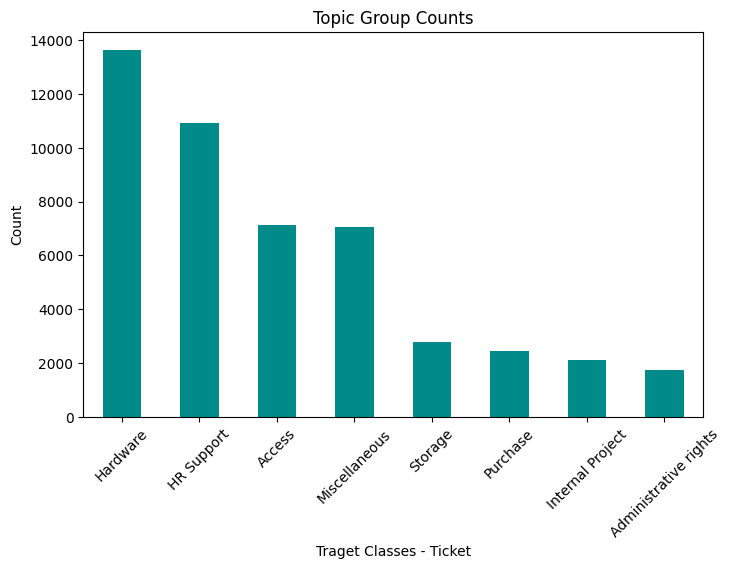

In [11]:
# Plot a bar chart of topic group counts
plt.figure(figsize=(8, 5))
df['Topic_group'].value_counts().plot(kind='bar', color='darkcyan')
plt.title('Topic Group Counts')
plt.xlabel('Traget Classes - Ticket')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
X = list(df['Document'])
Y = list(df['Topic_group'])

print("Data length (X, Y) is (",len(X),",",len(Y),")")

Data length (X, Y) is ( 47837 , 47837 )


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                Data Preprocessing
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
#Data preprocessing

#lower case the documents
X_lower = [i.lower() for i in X]
print("----Lower casing of terms----")
#Tokenization
X_Tokens = [word_tokenize(i) for i in X_lower]
print("----Tokenization of terms----")
#Removable of Punctuation and Non-Alpha
X_alpha  = [[word for word in doc if word.isalnum()]for doc in X_Tokens]
print("----Filtering out alphanumeric terms----")
#Removal of stop words
stop_words = set(stopwords.words('english'))
X_without_stopwords = [[word for word in doc if word not in stop_words]for doc in X_alpha]
print("----Removing Stop words----")
# #Lemmatize the words
# lemmatizer = WordNetLemmatizer()
# X_lemmas   = [[lemmatizer.lemmatize(word) for word in doc]for doc in X_without_stopwords]
# print("----Lemmatization of terms----")

# X = [" ".join(set(row)) for row in X_lemmas]
X = [" ".join(row) for row in X_without_stopwords]
print("\nNo. of Documents:",len(X))

----Lower casing of terms----
----Tokenization of terms----
----Filtering out alphanumeric terms----
----Removing Stop words----

No. of Documents: 47837


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Splitting the Datasets into Train and Test
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
#Splitting data into train and test
print("Totaal data:")
print(len(X),len(Y))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("\nTest data:")
print(len(X_test),len(y_test))

print("\nTrain data:")
print(len(X_train),len(y_train))

Totaal data:
47837 47837

Test data:
9568 9568

Train data:
38269 38269


In [15]:
# Tokenization and padding
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)  # Considering top 5000 frequent words

tokenizer.fit_on_texts(X)
X_train_seq    = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_seq, maxlen=100,padding='post')  # Padding sequences to a maximum length of 100

# tokenizer.fit_on_texts(X_test)
X_test_seq    = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_seq, maxlen=100,padding='post')  # Padding sequences to a maximum length of 100


In [16]:
#Using LabelEncoder converting Y values into unique integers
# Encoding labels
def Y_Encoder_function(Y):
    label_encoder   = LabelEncoder()
    y_encoded       = label_encoder.fit_transform(Y)

    return y_encoded

Y_train_encoded = Y_Encoder_function(y_train)
Y_test_encoded  = Y_Encoder_function(y_test)

print("len(Y_train): ",len(Y_train_encoded))
print("len(Y_test) : ",len(Y_test_encoded))


len(Y_train):  38269
len(Y_test) :  9568


In [17]:
#Converting to Categorical Features
num_classes = len(set(Y))
print("Number of Classes : ",num_classes)
y_test_categorical  = to_categorical(Y_test_encoded,num_classes=num_classes)
y_train_categorical = to_categorical(Y_train_encoded,num_classes=num_classes)

print("len(Y_train)      : ",len(y_train_categorical))
print("len(Y_test)       : ",len(y_test_categorical))


Number of Classes :  8
len(Y_train)      :  38269
len(Y_test)       :  9568


--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                           Simple Sequential Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [106]:
# Define the sequential model
#A simple sequential model

model = Sequential([
    Embedding(input_dim=max_words, output_dim=16),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
#     Dense(16, activation='relu'),
    Dense(8, activation='softmax')  # Output layer with 8 classes and softmax activation
])


In [107]:
#compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [108]:
# Training the model
model.fit(X_train_padded, np.array(y_train_categorical), epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2101 - loss: 0.4662 - val_accuracy: 0.2799 - val_loss: 0.3394
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2772 - loss: 0.3490 - val_accuracy: 0.4270 - val_loss: 0.2937
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4271 - loss: 0.2959 - val_accuracy: 0.5805 - val_loss: 0.2320
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5787 - loss: 0.2433 - val_accuracy: 0.6552 - val_loss: 0.1970
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6498 - loss: 0.2105 - val_accuracy: 0.7656 - val_loss: 0.1670
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6974 - loss: 0.1911 - val_accuracy: 0.7792 - val_loss: 0.1518
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7431 - loss: 0.1740 - val_accuracy: 0.7964 - val_loss: 0.1452
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7556 - loss: 0.1643 - val_accuracy: 0

In [109]:
# Evaluate on test data (pretend the test set is already prepared)
loss, accuracy = model.evaluate(X_test_padded, np.array(y_test_categorical))
print("Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8119 - loss: 0.1307
Test Accuracy: 80.67516684532166


In [22]:
#summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,298 (977.73 KB)

 Trainable params: 83,432 (325.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 166,866 (651.82 KB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    RNN Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
#Recurrent Neural Networks
#SimpleRNN

# Define the RNN model
rnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    SimpleRNN(32),  # RNN layer with 32 units    
    Dense(8, activation='softmax')
])

In [33]:
#Compile the model RNN
rnn_model.compile(loss='msle', optimizer='adam', metrics=['accuracy'])

In [34]:
# Training the RNN model
rnn_model.fit(X_train_padded, np.array(y_train_categorical), epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4290 - loss: 0.0443 - val_accuracy: 0.6229 - val_loss: 0.0348
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6511 - loss: 0.0326 - val_accuracy: 0.6099 - val_loss: 0.0337
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6748 - loss: 0.0292 - val_accuracy: 0.6735 - val_loss: 0.0297
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6943 - loss: 0.0281 - val_accuracy: 0.6614 - val_loss: 0.0304
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5957 - loss: 0.0339 - val_accuracy: 0.5483 - val_loss: 0.0384
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6069 - loss: 0.0347 - val_accuracy: 0.6210 - val_loss: 0.0339
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6766 - loss: 0.0298 - val_accuracy: 0.6455 - val_loss: 0.0322
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6753 - loss: 0.0298 - val_accu

In [35]:
# Evaluate RNN model on test data
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test_padded, np.array(y_test_categorical))
print("RNN Model Test Accuracy:", accuracy_rnn*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6200 - loss: 0.0342
RNN Model Test Accuracy: 61.684781312942505


In [27]:
#summary of the model
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 986,330 (3.76 MB)

 Trainable params: 328,776 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 657,554 (2.51 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Bidirectional RNN Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
# Define the Bidirectional RNN model
bidirectional_rnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    Bidirectional(SimpleRNN(64)),  # Bidirectional RNN layer with 64 units
    Dense(8, activation='softmax')
])

In [29]:
#Compile the bidirectional model
bidirectional_rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Training the Bidirectional RNN model
bidirectional_rnn_model.fit(X_train_padded, np.array(y_train_categorical), epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.4086 - loss: 0.3542 - val_accuracy: 0.6837 - val_loss: 0.2212
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7184 - loss: 0.1970 - val_accuracy: 0.7682 - val_loss: 0.1552
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7738 - loss: 0.1552 - val_accuracy: 0.8011 - val_loss: 0.1378
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8378 - loss: 0.1155 - val_accuracy: 0.8074 - val_loss: 0.1305
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8562 - loss: 0.1018 - val_accuracy: 0.7750 - val_loss: 0.1508
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8591 - loss: 0.0984 - val_accuracy: 0.8183 - val_loss: 0.1258
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8647 - loss: 0.0948 - val_accuracy: 0.8151 - val_loss: 0.1252
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8833 - loss: 0.0822 - val_acc

In [111]:
loss_bidirectional_rnn, accuracy_bidirectional_rnn = bidirectional_rnn_model.evaluate(X_test_padded, np.array(y_test_categorical))
print("Bidirectional RNN Model Test Accuracy:", accuracy_bidirectional_rnn*100)


299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8193 - loss: 0.1329
Bidirectional RNN Model Test Accuracy: 81.53219223022461


In [32]:
#summary of the model
bidirectional_rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,634 (3.86 MB)

 Trainable params: 337,544 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 675,090 (2.58 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Deep RNN Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [47]:
# Define the Deep RNN model
deep_rnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=16),
    SimpleRNN(64, return_sequences=True),  # RNN layer with 64 units and return sequences   
    SimpleRNN(32),    
    Dense(8, activation='softmax')
])

In [50]:
#Compile the Model
deep_rnn_model.compile(loss='kld', optimizer='adam', metrics=['accuracy'])

In [51]:
# Training the Deep RNN model
deep_rnn_model.fit(X_train_padded, np.array(y_train_categorical), epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5135 - loss: 1.4442 - val_accuracy: 0.5861 - val_loss: 1.2640
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6371 - loss: 1.1582 - val_accuracy: 0.6450 - val_loss: 1.1515
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6674 - loss: 1.0878 - val_accuracy: 0.5234 - val_loss: 1.4357
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5064 - loss: 1.4582 - val_accuracy: 0.5176 - val_loss: 1.4294
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.5340 - loss: 1.3921 - val_accuracy: 0.4596 - val_loss: 1.5430
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4746 - loss: 1.5106 - val_accuracy: 0.4608 - val_loss: 1.5291
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.4602 - loss: 1.5460 - val_accuracy: 0.4961 - val_loss: 1.5214
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5399 - loss: 1.3960 - val_acc

In [52]:
loss_deep_rnn, accuracy_deep_rnn = deep_rnn_model.evaluate(X_test_padded, np.array(y_test_categorical))
print("Deep RNN Model Test Accuracy:", accuracy_deep_rnn*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5892 - loss: 1.3030
Deep RNN Model Test Accuracy: 58.821070194244385


In [37]:
#summary
deep_rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │        80,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100, 64)        │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 265,658 (1.01 MB)

 Trainable params: 88,552 (345.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 177,106 (691.82 KB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    CNN Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
# Define the CNN model
# cnn_model = Sequential([
#     Embedding(input_dim=max_words, output_dim=64),
#     Conv1D(128, 5, activation='relu'),  # 128 filters with kernel size 5
#     GlobalMaxPooling1D(),
#     Dense(8, activation='sigmoid')
# ])

cnn_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=128, activation='relu'),
    Flatten(),  # Flatten the output from the convolutional layer    
    Dense(units=8, activation='softmax')
])

In [39]:
#Compile the model
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Training the CNN model
cnn_model.fit(X_train_padded, np.array(y_train_categorical), epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3753 - loss: 0.3680 - val_accuracy: 0.8014 - val_loss: 0.1294
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - loss: 0.1096 - val_accuracy: 0.8415 - val_loss: 0.1017
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.0774 - val_accuracy: 0.8428 - val_loss: 0.1004
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9209 - loss: 0.0581 - val_accuracy: 0.8465 - val_loss: 0.0995
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9439 - loss: 0.0446 - val_accuracy: 0.8490 - val_loss: 0.1019
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.0324 - val_accuracy: 0.8464 - val_loss: 0.1101
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0238 - val_accuracy: 0.8458 - val_loss: 0.1182
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0166 - val_accuracy: 0

In [113]:
#Evaluate the model
loss_cnn, accuracy_cnn = cnn_model.evaluate(X_test_padded, np.array(y_test_categorical))
print("CNN Model Test Accuracy:", accuracy_cnn*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8341 - loss: 0.1576
CNN Model Test Accuracy: 82.99540281295776


In [42]:
#summary
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 98, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025,114 (3.91 MB)

 Trainable params: 341,704 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 683,410 (2.61 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                   LSTM Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [100]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    LSTM(64),  # LSTM layer with 64 units
    Dense(units=8, activation='softmax')
])

In [101]:
# Compile the model
lstm_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [102]:
# Train the LSTM model
lstm_model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2463 - loss: 0.3886 - val_accuracy: 0.2799 - val_loss: 0.3427
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2817 - loss: 0.3405 - val_accuracy: 0.4373 - val_loss: 0.3082
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4372 - loss: 0.3053 - val_accuracy: 0.4415 - val_loss: 0.2970
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4686 - loss: 0.2853 - val_accuracy: 0.4709 - val_loss: 0.2815
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5085 - loss: 0.2651 - val_accuracy: 0.4990 - val_loss: 0.2636
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5579 - loss: 0.2462 - val_accuracy: 0.6500 - val_loss: 0.2264
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7013 - loss: 0.2025 - val_accuracy: 0.6918 - val_loss: 0.1945
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7599 - loss: 0.1712 - val_accuracy: 0.

In [114]:
#Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test_padded, y_test_categorical)
print("LSTM Model Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8053 - loss: 0.1378
LSTM Model Test Accuracy: 79.98536825180054


In [47]:
#summary
lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,634 (4.05 MB)

 Trainable params: 353,544 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 707,090 (2.70 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Bidirectional LSTM Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [48]:
# Define the Bidirectional LSTM model
bidirectional_lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    Bidirectional(LSTM(units=64, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(units=8, activation='softmax')
])

In [49]:
# Compile the model
bidirectional_lstm_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Train the Bidirectional LSTM model
bidirectional_lstm_model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=100, validation_split=0.2)


Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.2955 - loss: 0.3789 - val_accuracy: 0.4065 - val_loss: 0.3141
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4156 - loss: 0.3090 - val_accuracy: 0.4507 - val_loss: 0.2908
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5144 - loss: 0.2734 - val_accuracy: 0.5950 - val_loss: 0.2500
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7063 - loss: 0.2003 - val_accuracy: 0.7599 - val_loss: 0.1672
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7852 - loss: 0.1549 - val_accuracy: 0.7953 - val_loss: 0.1413
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8208 - loss: 0.1252 - val_accuracy: 0.7793 - val_loss: 0.1443
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8444 - loss: 0.1077 - val_accuracy: 0.8345 - val_loss: 0.1180
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8728 - loss: 0.0921 - val_accu

In [115]:
#Evaluate the model
loss, accuracy = bidirectional_lstm_model.evaluate(X_test_padded, y_test_categorical)
print("Bidirectional LSTM Model Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8496 - loss: 0.1152
Bidirectional LSTM Model Test Accuracy: 84.59448218345642


In [52]:
#summary
bidirectional_lstm_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 774,162 (2.95 MB)

 Trainable params: 387,080 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 387,082 (1.48 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Stacked LSTM Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [53]:
# Define the Stacked LSTM model
stacked_lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    LSTM(units=64, return_sequences=True),  # First LSTM layer with return_sequences=True
    LSTM(units=32),  # Second LSTM layer without return_sequences
    Dense(units=8, activation='softmax')
])

In [54]:
# Compile the model
stacked_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
# Train the model
stacked_lstm_model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.2751 - loss: 0.3879 - val_accuracy: 0.2799 - val_loss: 0.3423
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3196 - loss: 0.3368 - val_accuracy: 0.2799 - val_loss: 0.3426
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2827 - loss: 0.3408 - val_accuracy: 0.2799 - val_loss: 0.3421
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2856 - loss: 0.3400 - val_accuracy: 0.2799 - val_loss: 0.3410
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3693 - loss: 0.3214 - val_accuracy: 0.4531 - val_loss: 0.2854
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4827 - loss: 0.2772 - val_accuracy: 0.4777 - val_loss: 0.2746
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5390 - loss: 0.2553 - val_accuracy: 0.5400 - val_loss: 0.2513
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6158 - loss: 0.2217 - val_accu

In [116]:
#Evaluate the model
loss, accuracy = stacked_lstm_model.evaluate(X_test_padded, y_test_categorical)
print("Stacked LSTM Model Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7399 - loss: 0.1759
Stacked LSTM Model Test Accuracy: 73.27550053596497


In [57]:
#summary
stacked_lstm_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097,114 (4.19 MB)

 Trainable params: 365,704 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 731,410 (2.79 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Convolutional LSTM Model
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [96]:
# Define the Convolutional LSTM model for text classification
convLSTM_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(units=64),
    Dense(units=8, activation='softmax')
])

In [97]:
# Compile the model
convLSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [98]:
# Train the model
convLSTM_model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2513 - loss: 0.3854 - val_accuracy: 0.2799 - val_loss: 0.3422
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3137 - loss: 0.3342 - val_accuracy: 0.4783 - val_loss: 0.2740
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5574 - loss: 0.2440 - val_accuracy: 0.7430 - val_loss: 0.1821
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7797 - loss: 0.1529 - val_accuracy: 0.8001 - val_loss: 0.1352
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8471 - loss: 0.1072 - val_accuracy: 0.8077 - val_loss: 0.1296
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8716 - loss: 0.0931 - val_accuracy: 0.8457 - val_loss: 0.1122
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9105 - loss: 0.0703 - val_accuracy: 0.8473 - val_loss: 0.1101
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9319 - loss: 0.0550 - val_accuracy: 0.

In [117]:
#Evaluate the model
loss, accuracy = convLSTM_model.evaluate(X_test_padded, y_test_categorical)
print("Conv LSTM Model Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8325 - loss: 0.1329
Conv LSTM Model Test Accuracy: 83.23578834533691


In [62]:
#summary
convLSTM_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097,690 (4.19 MB)

 Trainable params: 365,896 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 731,794 (2.79 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Embedding Type : GloVe
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
#Different Embedding approaches for Bidirectional LSTM Model
#Approach GloVe

glove_file_path = r"/kaggle/input/glove-embeddings/glove.6B.100d.txt"
embeddings_link = {}

file_handle = open(glove_file_path,'r',encoding="utf8")
data        = file_handle.readlines()
file_handle.close()

for line in data:
    word, coefs           = line.split(maxsplit=1)
    coefs                 = np.fromstring(coefs,"f",sep=" ")
    embeddings_link[word] = coefs

print("Total word vectors : ",len(embeddings_link))

Total word vectors :  400000


In [56]:
vectorizer = TextVectorization(max_tokens=5000, output_sequence_length=200)
text_ds    = tf.data.Dataset.from_tensor_slices(X_train).batch(100)
vectorizer.adapt(text_ds)

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc,range(len(voc))))

In [58]:
#creating the embedding matrix

token_count = len(voc) + 2
embedding_dim = 100
present = 0
absent  = 0

embedding_matrix = np.zeros((token_count,embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_link.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        present += 1
    else:
        absent += 1

print("Embeddings present ",present)
print("Embeddings absent  ",absent)

Embeddings present  4982
Embeddings absent   18


In [59]:
#creating the Embedding layer

embedding_layer = Embedding(token_count, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False)

In [60]:
#Different Embedding approaches for Bidirectional LSTM Model
#Glove

# Define the Bidirectional LSTM model
bidirectional_lstm_model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(units=64, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(units=8, activation='softmax')
])

In [61]:
# Compile the model
bidirectional_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [62]:
# Train the model
bidirectional_lstm_model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.4100 - loss: 0.3315 - val_accuracy: 0.7588 - val_loss: 0.1619
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8054 - loss: 0.1334 - val_accuracy: 0.8305 - val_loss: 0.1130
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8668 - loss: 0.0923 - val_accuracy: 0.8443 - val_loss: 0.1018
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8881 - loss: 0.0776 - val_accuracy: 0.8518 - val_loss: 0.0961
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9099 - loss: 0.0640 - val_accuracy: 0.8558 - val_loss: 0.0938
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9219 - loss: 0.0568 - val_accuracy: 0.8542 - val_loss: 0.0963
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9295 - loss: 0.0515 - val_accuracy: 0.8521 - val_loss: 0.0965
Epoch 8/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9396 - loss: 0.0453 - val_accu

In [63]:
#Evaluate the model
loss, accuracy = bidirectional_lstm_model.evaluate(X_test_padded, y_test_categorical)
print("Bidirectional LSTM Model Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8495 - loss: 0.1105
Bidirectional LSTM Model Test Accuracy: 84.38544869422913


In [64]:
#summary
bidirectional_lstm_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 100, 100)       │       500,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 128)       │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,757,138 (6.70 MB)

 Trainable params: 585,712 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,171,426 (4.47 MB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Embedding tyoe : Word2Vec
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [65]:
#create Embedded Matrix
#Approach Word2Vec

# Load pre-trained Word2Vec model
word2vec_model_path = r"/kaggle/input/glove-word2vec-embeddings/GoogleNews-vectors-negative300.bin"
word2vec_model      = gensim.models.KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

In [66]:
word_index = tokenizer.word_index
word_count = len(word_index) + 1
embedding_dim = 300
embedding_matrix = np.zeros((word_count, embedding_dim))
present = 0
absnet  = 0
for word, i in word_index.items():
    if word in word2vec_model:
        embedding_matrix[i] = word2vec_model[word]
        present += 1
    else:
        absent += 1

print("Embeddings present ",present)
print("Embeddings absent  ",absent)


Embeddings present  11983
Embeddings absent   239


In [68]:
#creating the Embedding layer

embedding_layer = Embedding(word_count, embedding_dim, embeddings_initializer=keras.initializers.Constant(embedding_matrix), trainable=False)

In [69]:
#Different Embedding approaches for Bidirectional LSTM Model
#word2vec

# Define the Bidirectional LSTM model
bidirectional_lstm_model = Sequential([
    embedding_layer,
    Bidirectional(LSTM(units=64, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(units=8, activation='softmax')
])

In [70]:
# Compile the model
bidirectional_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [71]:
# Train the model
bidirectional_lstm_model.fit(X_train_padded, y_train_categorical, epochs=10, batch_size=200, validation_split=0.2)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.4088 - loss: 0.3525 - val_accuracy: 0.8008 - val_loss: 0.1368
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8394 - loss: 0.1161 - val_accuracy: 0.8383 - val_loss: 0.1081
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8852 - loss: 0.0821 - val_accuracy: 0.8461 - val_loss: 0.0988
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9079 - loss: 0.0667 - val_accuracy: 0.8592 - val_loss: 0.0939
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9230 - loss: 0.0564 - val_accuracy: 0.8598 - val_loss: 0.0924
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9328 - loss: 0.0500 - val_accuracy: 0.8611 - val_loss: 0.0947
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9463 - loss: 0.0427 - val_accuracy: 0.8576 - val_loss: 0.1007
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9479 - loss: 0.0413 - val_accu

In [73]:
#Evaluate the model
loss, accuracy = bidirectional_lstm_model.evaluate(X_test_padded, y_test_categorical)
print("Bidirectional LSTM Model Test Accuracy:", accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8470 - loss: 0.1125
Bidirectional LSTM Model Test Accuracy: 84.2391312122345


In [74]:
#summary
bidirectional_lstm_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 100, 300)       │     3,661,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 100, 128)       │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,548,238 (44.05 MB)

 Trainable params: 3,849,412 (14.68 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,698,826 (29.37 MB)

                                                        **Performance Analysis of algorithms:**

 Algorithm & Accuracy

* Dense Sequential   : 80.67 %
* RNN                : 61.68  %
* Bidirectional RNN  : 81.53 %
* Deep RNN           : 58.82 %
* CNN                : 82.99 %
* LSTM               : 79.98 %
* Bidirectional LSTM : 84.59 %
* Stacked LSTM       : 73.27  %
* Convolutional LSTM : 83.23  %

1. **CNN (Convolutional Neural Network)**: 
Achieves the highest accuracy at 82.99%. CNNs are effective for text classification tasks due to their ability to capture local patterns and hierarchical representations within the text data. They excel in tasks where spatial relationships are important, such as identifying patterns in sequences of words or characters.

2. **ConvLSTM (Convolutional LSTM)**: 
Performs impressively at 83.23%. Combining convolutional layers with LSTM units allows the model to capture both spatial and sequential dependencies in the text data, making it suitable for tasks requiring understanding of both local and long-range dependencies.

3. **Bi-LSTM (Bidirectional Long Short-Term Memory)**: 
Maintains a high accuracy of 84.59%. Bi-LSTMs are well-suited for text classification tasks as they can capture contextual information from both past and future tokens in the text, enabling the model to better understand the semantics and meaning of the text.

4. **LSTM (Long Short-Term Memory)**: 
Achieves an accuracy of 79.98%. LSTMs are commonly used for text classification tasks due to their ability to capture long-term dependencies and handle sequential data effectively. They are suitable for tasks where understanding the context of words over time is crucial.

5. **Dense Sequential**: 
Scores at 80.67%, indicating good performance. Dense sequential models are simpler architectures compared to CNNs and LSTMs but can still perform well on text classification tasks, especially on simpler datasets or tasks where local context is more important than sequential dependencies.

6. **Bi-RNN (Bidirectional Recurrent Neural Network)**: 
Achieves a relatively high accuracy of 81.53%. Bi-RNNs are effective for text classification tasks as they can capture contextual information from both past and future words in the text, similar to Bi-LSTMs.

7. **RNN and Deep RNN**:
Both underperform compared to other architectures, with scores of 61.68% and 58.82% respectively. This suggests that deeper recurrent architectures may not be as effective for text classification tasks, possibly due to challenges in training or **overfitting** on the given dataset.

8. **Stacked LSTM**: 
Shows moderate accuracy at 73.27%. Stacked LSTMs consist of multiple LSTM layers stacked on top of each other, allowing for the learning of complex hierarchical representations. However, increasing the depth may lead to overfitting or training difficulties.

9. **Bidirectional LSTM with GloVe Embedding**:
GloVe (Global Vectors for Word Representation) with an accuracy of 84.38%, embeddings provide dense vector representations of words based on their co-occurrence statistics in a large corpus. By utilizing GloVe embeddings, the bidirectional LSTM effectively captures semantic relationships between words, enhancing its understanding of contextual information. The higher accuracy of 84.38% suggests that the bidirectional LSTM, when combined with GloVe embeddings, can effectively handle tasks requiring nuanced understanding of language semantics and context.

10.**Bidirectional LSTM with Word2Vec Embedding**:
Word2Vec embeddings with an accuracy of 84.23% represent words as dense vectors based on their distributional properties within a corpus. Despite a slightly lower accuracy compared to GloVe embeddings, Word2Vec embeddings still provide valuable contextual information to the bidirectional LSTM. The accuracy of 84.23% indicates that Word2Vec embeddings enable the bidirectional LSTM to capture meaningful semantic relationships and contextual nuances, contributing to its performance in natural language processing tasks.


**Few more algorithmic perspective:**

**Model Architecture Modifications**: For RNN-based models (including LSTM and Bidirectional LSTM), consider using variants like GRU (Gated Recurrent Unit) or attention mechanisms to improve the model's ability to capture long-range dependencies. For CNN-based models, try different architectures, filter sizes, and pooling strategies to capture relevant features effectively.

**Data Preprocessing Impact**: The preprocessing steps applied to the text data, such as tokenization, lower casing, and vectorization, can significantly influence the performance of the models. Understanding how different preprocessing techniques affect model performance can help optimize the text classification pipeline.

**Ensemble Learning**: Combine predictions from multiple models (e.g., different variations of LSTM, CNN) to leverage their complementary strengths and improve overall performance.

**Hyperparameter Sensitivity**: The performance of the models may be sensitive to hyperparameter choices such as learning rates, batch sizes, or dropout rates. Conducting thorough hyperparameter tuning experiments can help identify the optimal configuration for each model architecture.

**Effectiveness of Bidirectional Architectures**: Both Bi-LSTM and Bi-RNN architectures perform well, indicating the importance of capturing bidirectional dependencies in text data. Bidirectional models have an advantage in understanding the context of words by considering both past and future information, which can be crucial for accurate classification.



In summary, the analysis indicates that architectures like CNNs, Bi-LSTMs, and ConvLSTMs perform well for text classification tasks, while simpler architectures like Dense Sequential models can also yield competitive performance. Notably, models like Bidirectional LSTM and CNN demonstrate higher accuracies, surpassing 80%, indicating their effectiveness in capturing complex patterns and context from sequential data. However, deeper architectures such as Deep RNN and Stacked LSTM may face challenges and may require careful tuning to achieve satisfactory results. Selecting appropriate word embeddings and leveraging their contextual information to enhance the performance of bidirectional LSTM models in natural language processing applications. Overall, these results underscore the importance of selecting appropriate architectures and optimization strategies tailored to the specific requirements of the task at hand to achieve optimal performance.

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                   Bonus: Sample code for Universal Sentence Encoder (USE) from Tensorflow hub
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [77]:
X = list(df['Document'])
Y = list(df['Topic_group'])

print("Data length (X, Y) is (",len(X),",",len(Y),")")

#Splitting data into train and test
print("Totaal data:")
print(len(X),len(Y))
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
print("\nTest data:")
print(len(X_val),len(y_val))

print("\nTrain data:")
print(len(X_train),len(y_train))


Data length (X, Y) is ( 47837 , 47837 )
Totaal data:
47837 47837

Test data:
9568 9568

Train data:
38269 38269


In [78]:
# Load Universal Sentence Encoder model from TensorFlow Hub
model_name = "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2"
use_model = hub.load(model_name)


Attaching model 'google/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2' to your Kaggle notebook...


In [79]:
# Encode input texts using Universal Sentence Encoder
X_train_embeddings = use_model(X_train)
X_val_embeddings   = use_model(X_val)

In [81]:
#convert array to tensors
def Y_Encoder_function(Y):
    label_encoder   = LabelEncoder()
    y_encoded       = label_encoder.fit_transform(Y)

    return y_encoded

Y_train        = Y_Encoder_function(y_train)
Y_train_tensor = tf.convert_to_tensor(Y_train, dtype=tf.int32)

Y_val        = Y_Encoder_function(y_val)
Y_val_tensor = tf.convert_to_tensor(Y_val, dtype=tf.int32)

In [82]:
#Converting to Categorical Features
num_classes = len(set(Y))
print("Number of Classes : ",num_classes)
y_test_categorical  = to_categorical(Y_val_tensor,num_classes=num_classes)
y_train_categorical = to_categorical(Y_train_tensor,num_classes=num_classes)

print("len(Y_train)      : ",len(y_train_categorical))
print("len(Y_test)       : ",len(y_test_categorical))


Number of Classes :  8
len(Y_train)      :  38269
len(Y_test)       :  9568


In [109]:
# Define a simple feedforward neural network
model = tf.keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train_embeddings.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu', input_shape=(X_train_embeddings.shape[1],)),
    Dropout(0.5),
    Flatten(),
    Dense(8, activation='softmax')
])

In [110]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [111]:
# Train the model
history = model.fit(X_train_embeddings, y_train_categorical, epochs=50, batch_size=200)

Epoch 1/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.2260 - loss: 0.4739
Epoch 2/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 0.2390
Epoch 3/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.1926
Epoch 4/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7238 - loss: 0.1772
Epoch 5/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7400 - loss: 0.1682
Epoch 6/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7533 - loss: 0.1592
Epoch 7/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.1532
Epoch 8/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - loss: 0.1514
Epoch 9/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.1468
Epoch 10/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7734 - loss: 0.1461
Epoch 11/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7820 - loss: 0.1402
Epoch 12/50
192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [98]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val_embeddings, y_test_categorical)
print("Accuracy of model : ",accuracy*100)

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8142 - loss: 0.5633
Accuracy of model :  81.14548325538635


In [112]:
#summary
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,322 (872.36 KB)

 Trainable params: 74,440 (290.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148,882 (581.57 KB)

--------------------------------------------------------------------------------------------------------------------------------------------------------
                                                    Sample code for TensorBoard graphic
--------------------------------------------------------------------------------------------------------------------------------------------------------

In [90]:
# Define log directories
train_log_dir = 'logs/train'
test_log_dir  = 'logs/test'

# Create summary writers
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
test_summary_writer = tf.summary.create_file_writer(test_log_dir)

In [91]:
# Generate dummy data for illustration purposes
x_train, y_train = X_train_padded, y_train_categorical
x_val, y_val     = X_test_padded, y_test_categorical

x_train         = x_train
y_train         = y_train

x_val           = x_val
y_val           = y_val

In [92]:
# Define the Convolutional LSTM model for text classification
convLSTM_model = Sequential([
    Embedding(input_dim=max_words, output_dim=64),
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(units=64),
    Dense(units=8, activation='softmax')
])

In [93]:
# Compile the model
convLSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [94]:
# Training loop
for epoch in range(10):  # Example of 10 epochs
    # Training
    print("Epoch : ",epoch)
    with train_summary_writer.as_default():
        loss, accuracy = convLSTM_model.train_on_batch(x_train, y_train)
        tf.summary.scalar('loss', loss, step=epoch)
        tf.summary.scalar('accuracy', accuracy, step=epoch)

    # Validation (for illustration purposes)
    with test_summary_writer.as_default():
        val_loss, val_accuracy = convLSTM_model.evaluate(x_val, y_val, verbose=0)
        tf.summary.scalar('val_loss', val_loss, step=epoch)
        tf.summary.scalar('val_accuracy', val_accuracy, step=epoch)

# Close summary writers
train_summary_writer.close()
test_summary_writer.close()

print("Done!")

Epoch :  0
Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Done!


In [95]:
#summary
convLSTM_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (38269, 100, 64)       │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (38269, 100, 64)       │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (38269, 50, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (38269, 64)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (38269, 8)             │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097,690 (4.19 MB)

 Trainable params: 365,896 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 731,794 (2.79 MB)

                                                    **Tensor Board Graphics Screenshots:**

**(a) Validation Loss:**

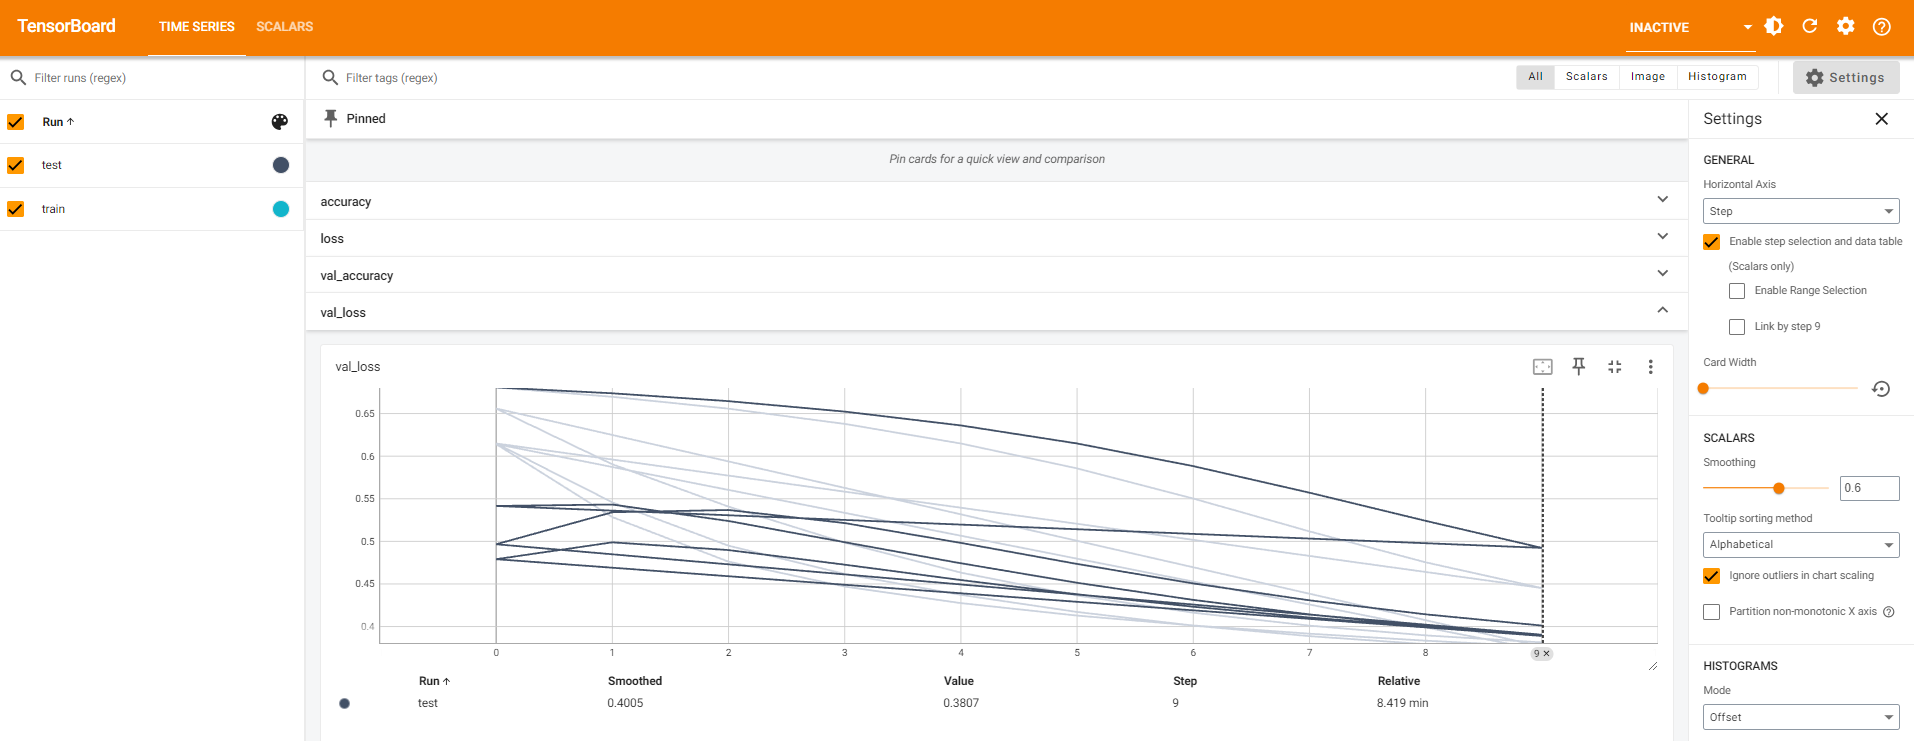

**(b) Validation Accuracy:**

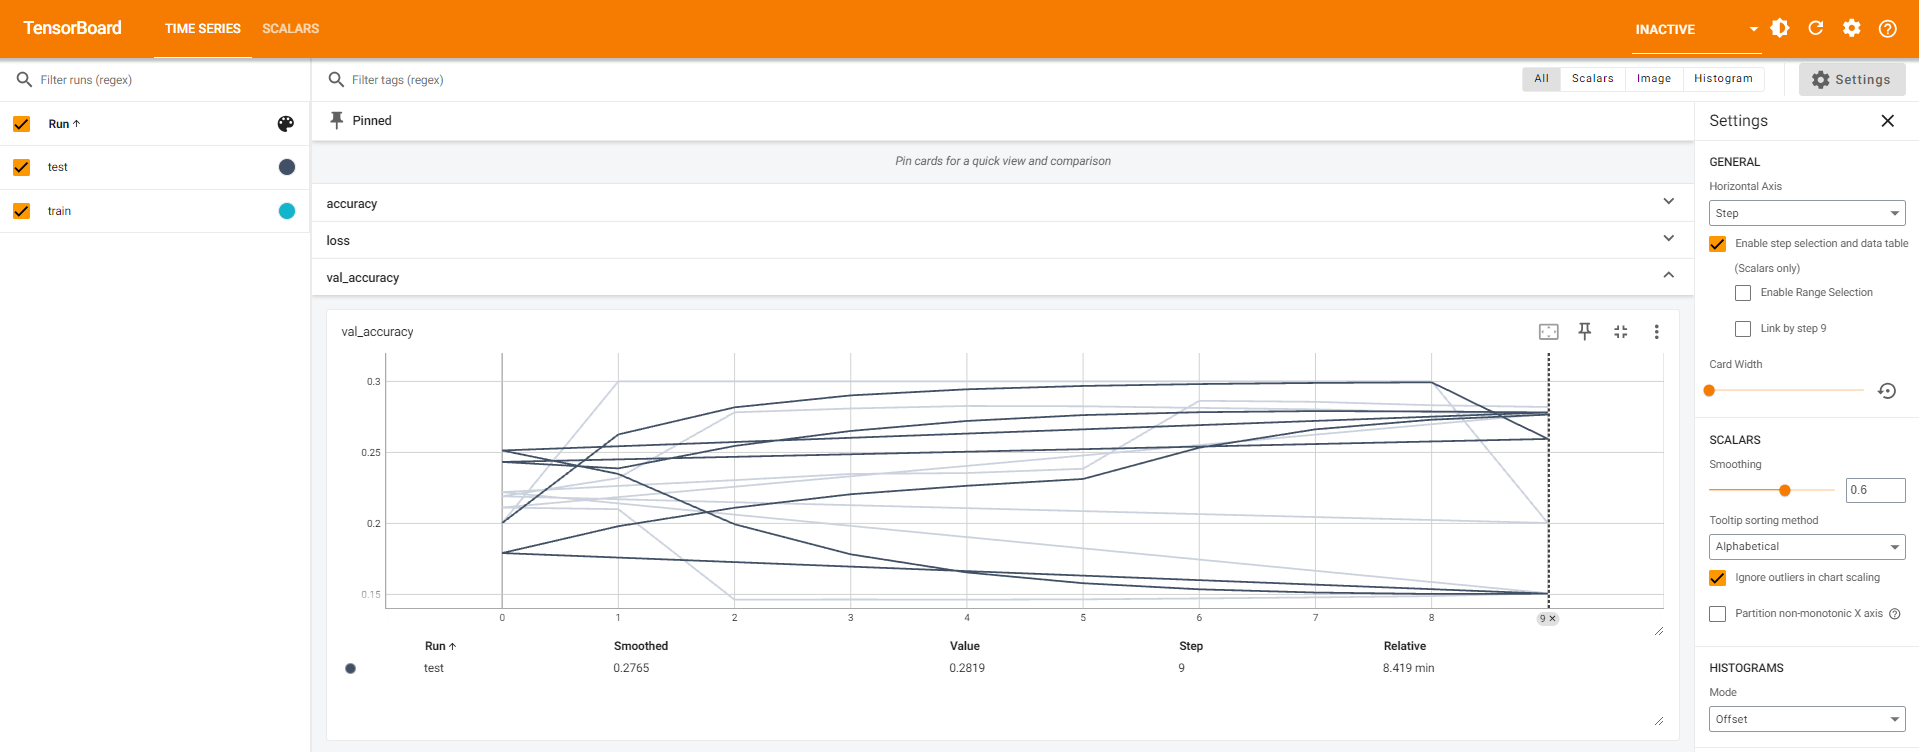

**(c) Training Loss:**

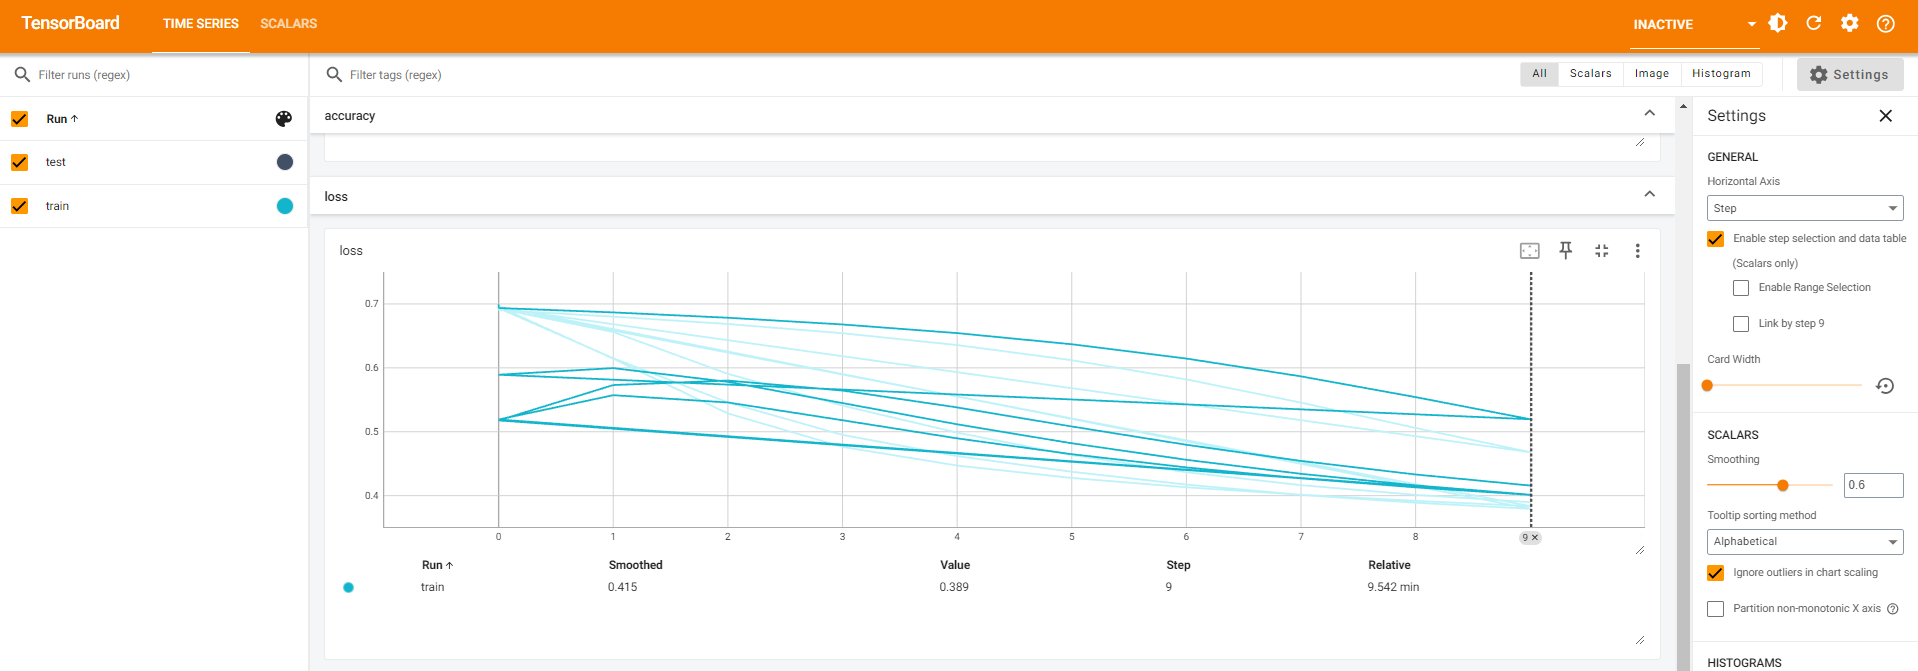

**(d) Training Accuracy:**

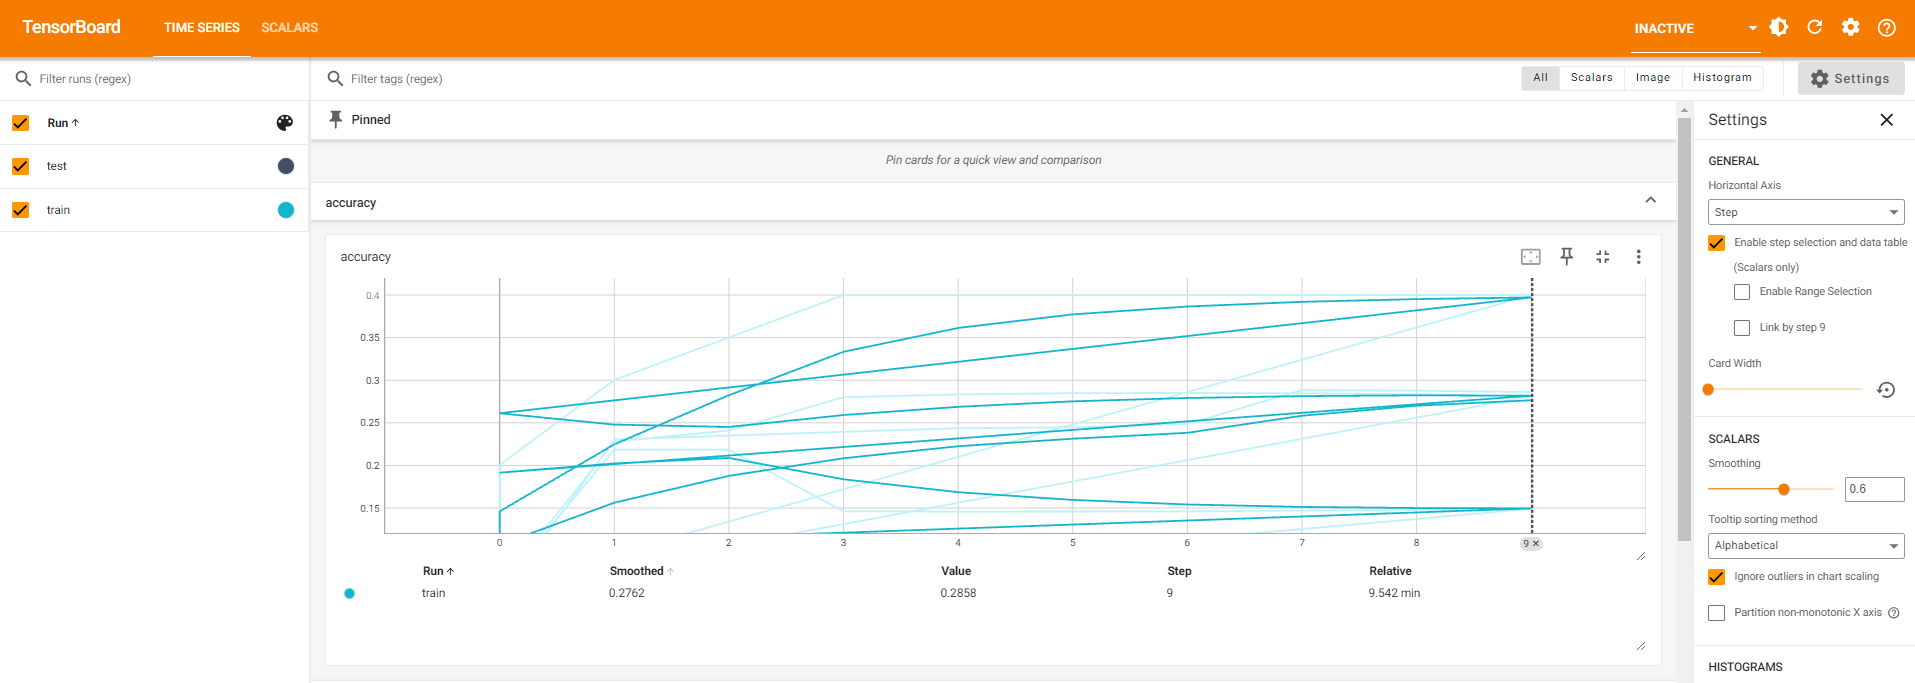

Two Items of Information on TensorBoards Interface:

**Loss and Metric Visualization:**

TensorBoard provides interactive visualizations of loss functions and evaluation metrics over time during training.
By observing these visualizations, you can identify trends such as whether the loss is decreasing steadily or fluctuating, and how metrics like accuracy or validation loss are evolving.
Understanding these trends helps you gauge the progress of your model training. If the loss is decreasing over epochs, it indicates that the model is learning, while erratic behavior might indicate issues like overfitting or underfitting.

**Graph Visualization:**

TensorBoard offers a graphical representation of your model architecture, making it easier to understand the flow of data through various layers.
This visualization helps you verify if your model has been constructed correctly, ensuring that the input and output shapes of each layer match your expectations.
Additionally, it can aid in identifying potential optimization opportunities, such as identifying redundant or inefficient layers, which can help in optimizing the computational performance of your model.
